In [1]:
library(sensemakr)
library(ivmodel)
library(AER)
library(dplyr)
library(data.table)
#library(stargazer)
#library(speedglm)
options(digits = 4, scipen = 99)

See details in:

Carlos Cinelli and Chad Hazlett (2020). Making Sense of Sensitivity: Extending Omitted Variable Bias. Journal of the Royal Statistical Society, Series B (Statistical Methodology).

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [16]:
# reads processed and filtered data
data <- readRDS("processed_data/filter4_data.rds")

In [17]:
# standardize PRS
data[ ,prs_std_hdl  := as.numeric(scale(prs_hdl))]
data[ ,prs_std_ldl  := as.numeric(scale(prs_ldl))]
data[ ,hdl_std  := as.numeric(scale(hdl))]
data[ ,ldl_std  := as.numeric(scale(ldl))]
data[ ,trig_std  := as.numeric(scale(triglycerides))]
data[ ,bmi_std  := as.numeric(scale(bmi))]
#data[ ,town_std:= as.numeric(scale(townsend))]
#data[ ,sbp_std:= as.numeric(scale(sbp))]
#data[ ,dbp_std:= as.numeric(scale(dbp))]

In [19]:
data <- na.omit(data, cols = c("prs_hdl", "prs_ldl",
                                "hdl_std", "chd", "ldl_std", "trig_std",
                                "bmi_std",
                                "age",
                                "sex",
                                "alcohol",
                                "smoking",
                                "assessment_centre",
                                "genotype_batch",
                                "PC1", "PC2", "PC3", "PC4", "PC5", "PC6",
                                "PC7", "PC8", "PC9", "PC10", "PC11",
                                "PC12", "PC13", "PC14", "PC15", "PC16", "PC17",
                                "PC18", "PC19", "PC20"))

In [7]:
X_no_ldl_tri <- model.matrix(~age + I(age^2) + sex +
                         #ldl_std + trig_std +
                         #alcohol + smoking +
                         assessment_centre + genotype_batch +
                         PC1 + PC2 + PC3 +  PC4 + PC5 + PC6 +
                         PC7 + PC8 + PC9 + PC10 + PC11 +
                         PC12 + PC13 + PC14 + PC15 + PC16 + PC17 +
                         PC18 + PC19 + PC20, data= data)

In [8]:
ivmodel.chd.no_ldl_tri <- ivmodel(Y = data$chd, D = data$hdl_std, Z = data$prs_std_hdl, X = X_no_ldl_tri)

Warning message in ivmodel(Y = data$chd, D = data$hdl_std, Z = data$prs_std_hdl, :
“Trying to add the intercept term of ones, 
                    but X already contains a constant covariate! Check your X. For now,
                    we'll not add an intercept term in X to avoid rank deficiency.”


In [9]:
summary(ivmodel.chd.no_ldl_tri)
confint(ivmodel.chd.no_ldl_tri)


Call:
ivmodel(Y = data$chd, D = data$hdl_std, Z = data$prs_std_hdl, 
    X = X_no_ldl_tri)
sample size: 252854
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

First Stage Regression Result:

F=20822, df1=1, df2=252704, p-value is <0.0000000000000002
R-squared=0.07613,   Adjusted R-squared=0.07612
Residual standard error: 0.8689 on 252705 degrees of freedom
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Coefficients of k-Class Estimators:

               k  Estimate Std. Error t value             Pr(>|t|)    
OLS     0.000000 -0.021002   0.000437   -48.0 < 0.0000000000000002 ***
Fuller  0.999996 -0.012835   0.001585    -8.1  0.00000000000000044 ***
LIML    1.000000 -0.012834   0.001585    -8.1  0.00000000000000044 ***
TSLS    1.000000 -0.012834   0.001585    -8.1  0.00000000000000044 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Alternative tests for the treatment effect 

,2.5%,97.5%
OLS,-0.02186,-0.020145
Fuller,-0.01594,-0.009727
LIML,-0.01594,-0.009727
TSLS,-0.01594,-0.009727
AR,-0.01594,-0.009725
CLR,-0.01594,-0.009725


In [11]:
X_ldl_tri <- model.matrix(~age + I(age^2) + sex +
                         ldl_std + trig_std +
                         #alcohol + smoking +
                         assessment_centre + genotype_batch +
                         PC1 + PC2 + PC3 +  PC4 + PC5 + PC6 +
                         PC7 + PC8 + PC9 + PC10 + PC11 +
                         PC12 + PC13 + PC14 + PC15 + PC16 + PC17 +
                         PC18 + PC19 + PC20, data= data)

In [12]:
ivmodel.chd.ldl_tri <- ivmodel(Y = data$chd, D = data$hdl_std, Z = data$prs_std_hdl, X = X_ldl_tri)

Warning message in ivmodel(Y = data$chd, D = data$hdl_std, Z = data$prs_std_hdl, :
“Trying to add the intercept term of ones, 
                    but X already contains a constant covariate! Check your X. For now,
                    we'll not add an intercept term in X to avoid rank deficiency.”


In [13]:
summary(ivmodel.chd.ldl_tri)
confint(ivmodel.chd.ldl_tri)


Call:
ivmodel(Y = data$chd, D = data$hdl_std, Z = data$prs_std_hdl, 
    X = X_ldl_tri)
sample size: 252854
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

First Stage Regression Result:

F=18387, df1=1, df2=252702, p-value is <0.0000000000000002
R-squared=0.06783,   Adjusted R-squared=0.06782
Residual standard error: 0.7861 on 252703 degrees of freedom
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Coefficients of k-Class Estimators:

               k  Estimate Std. Error t value             Pr(>|t|)    
OLS     0.000000 -0.015863   0.000476  -33.29 < 0.0000000000000002 ***
Fuller  0.999996 -0.011946   0.001830   -6.53       0.000000000067 ***
LIML    1.000000 -0.011945   0.001830   -6.53       0.000000000067 ***
TSLS    1.000000 -0.011945   0.001830   -6.53       0.000000000067 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Alternative tests for the treatment effect und

,2.5%,97.5%
OLS,-0.01680,-0.014929
Fuller,-0.01553,-0.008359
LIML,-0.01553,-0.008359
TSLS,-0.01553,-0.008359
AR,-0.01553,-0.008358
CLR,-0.01553,-0.008358


In [11]:
# First Stage
first.stage <- lm(hdl_std ~ prs_std_hdl + age + I(age^2) + sex +
                         ldl_std + trig_std +
                         alcohol + smoking  +
                         assessment_centre + genotype_batch +
                         PC1 + PC2 + PC3 +  PC4 + PC5 + PC6 +
                         PC7 + PC8 + PC9 + PC10 + PC11 +
                         PC12 + PC13 + PC14 + PC15 + PC16 + PC17 +
                         PC18 + PC19 + PC20,
                         data = data)

In [12]:
# variable groups
assessment_centre <- grep(names(coef(first.stage)), pattern = "assessment_centre", value = T)
batch_effects     <- grep(names(coef(first.stage)), pattern = "genotype_batch", value = T)
PCs               <- grep(names(coef(first.stage)), pattern = "PC", value = T)
smoking           <- grep("smoking",names(coef(first.stage)), value = T)
alcohol           <- grep("alcohol",names(coef(first.stage)), value = T)
age               <- grep("age",names(coef(first.stage)), value = T)
sex               <- grep("sex",names(coef(first.stage)), value = T)
ldl               <- grep("ldl_std",names(coef(first.stage)), value = T)
trig               <- grep("trig_std",names(coef(first.stage)), value = T)
all               <- c(assessment_centre, batch_effects, PCs, smoking, alcohol, age, sex, ldl, trig)

In [16]:
# we can use for checking partial association of PRS with other variables
instrument.model <- lm(prs_std_hdl ~  age + I(age^2) + sex +
                         ldl_std + trig_std +
                         alcohol + smoking  +
                         assessment_centre + genotype_batch +
                         PC1 + PC2 + PC3 +  PC4 + PC5 + PC6 +
                         PC7 + PC8 + PC9 + PC10 + PC11 +
                         PC12 + PC13 + PC14 + PC15 + PC16 + PC17 +
                         PC18 + PC19 + PC20,
                         data = data)

In [17]:
sensitivity_stats(model = first.stage,  treatment = "prs_std_hdl")

treatment,estimate,se,t_statistic,r2yd.x,rv_q,rv_qa,f2yd.x,dof
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<numeric>,<numeric>,<dbl>,<int>
prs_std_hdl,0.2139,0.001499,142.7,0.07457,0.2464,0.2435,0.08057,252695


In [18]:
group_partial_r2(model = first.stage, covariates = all)

[1] 0.4021

In [19]:
summary(instrument.model)$r.
group_partial_r2(model = instrument.model, covariates = all)

[1] 0.01181

[1] 0.01181

In [20]:
summary(first.stage)


Call:
lm(formula = hdl_std ~ prs_std_hdl + age + I(age^2) + sex + ldl_std + 
    trig_std + alcohol + smoking + assessment_centre + genotype_batch + 
    PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + 
    PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + 
    PC20, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-2.939 -0.504 -0.075  0.414  6.969 

Coefficients:
                                    Estimate Std. Error t value
(Intercept)                       -0.9420207  0.0771825  -12.21
prs_std_hdl                        0.2139340  0.0014993  142.69
age                                0.0573956  0.0027319   21.01
I(age^2)                          -0.0004552  0.0000246  -18.49
sexMale                           -0.7357156  0.0031536 -233.29
ldl_std                            0.1412382  0.0015551   90.82
trig_std                          -0.3659512  0.0015961 -229.27
alcoholNever                      -0.6789812  0.0067651 -100.37
alcoholOnce or tw

In [21]:
summary(instrument.model)


Call:
lm(formula = prs_std_hdl ~ age + I(age^2) + sex + ldl_std + trig_std + 
    alcohol + smoking + assessment_centre + genotype_batch + 
    PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + 
    PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + 
    PC20, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-4.336 -0.668 -0.001  0.664  4.539 

Coefficients:
                                    Estimate Std. Error t value
(Intercept)                       -0.4723990  0.1024036   -4.61
age                                0.0120178  0.0036246    3.32
I(age^2)                          -0.0000987  0.0000327   -3.02
sexMale                            0.0496287  0.0041832   11.86
ldl_std                            0.0129830  0.0020632    6.29
trig_std                          -0.1072819  0.0021070  -50.92
alcoholNever                       0.0113040  0.0089761    1.26
alcoholOnce or twice a week       -0.0036642  0.0058345   -0.63
alcoholOne to three times a

In [22]:
sens.first.stage.all <- sensemakr(model = first.stage,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`All` = all),
                              kd = c(0.2, 0.4, 0.6, 0.8, 1))
                              #kd = c(2, 4, 6, 8))

In [23]:
summary(sens.first.stage.all)

Sensitivity Analysis to Unobserved Confounding

Model Formula: hdl_std ~ prs_std_hdl + age + I(age^2) + sex + ldl_std + trig_std + 
    alcohol + smoking + assessment_centre + genotype_batch + 
    PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + 
    PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + 
    PC20

Null hypothesis: q = 1 and reduce = TRUE 
-- This means we are considering biases that reduce the absolute value of the current estimate.
-- The null hypothesis deemed problematic is H0:tau = 0 

Unadjusted Estimates of 'prs_std_hdl': 
  Coef. estimate: 0.214 
  Standard Error: 0.001 
  t-value (H0:tau = 0): 142.7 

Sensitivity Statistics:
  Partial R2 of treatment with outcome: 0.075 
  Robustness Value, q = 1: 0.246 
  Robustness Value, q = 1, alpha = 0.05: 0.243 

Verbal interpretation of sensitivity statistics:

-- Partial R2 of the treatment with the outcome: an extreme confounder (orthogonal to the covariates) that explains 100% of the residual var

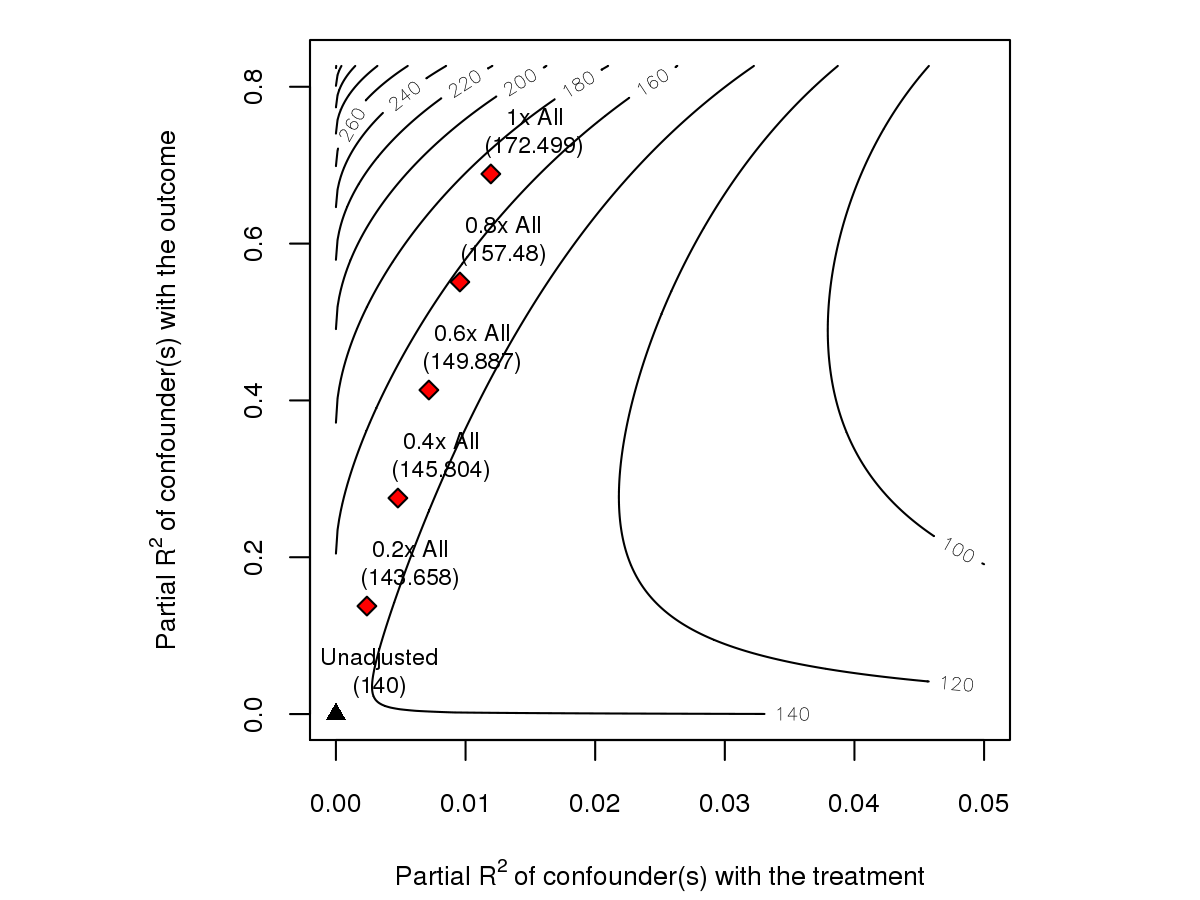

In [24]:
options(repr.plot.width = 6, repr.plot.height = 4.5, repr.plot.res = 200)
plot(sens.first.stage.all, sensitivity.of = "t-value", lim = 0.05)

In [25]:
# RF Coronary Heart Disease Sensitivity

reduced.form.chd <- lm(chd ~ prs_std_hdl + age + I(age^2) + sex +
                         ldl_std + trig_std +
                         alcohol + smoking +
                         assessment_centre + genotype_batch +
                         PC1 + PC2 + PC3 +  PC4 + PC5 + PC6 +
                         PC7 + PC8 + PC9 + PC10 + PC11 +
                         PC12 + PC13 + PC14 + PC15 + PC16 + PC17 +
                         PC18 + PC19 + PC20,
                         data = data)

In [26]:
partial_r2(reduced.form.chd, covariates = "prs_std_hdl")

prs_std_hdl 
  0.0001785

In [27]:
sensitivity_stats(reduced.form.chd, treatment = "prs_std_hdl")

treatment,estimate,se,t_statistic,r2yd.x,rv_q,rv_qa,f2yd.x,dof
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<numeric>,<numeric>,<dbl>,<int>
prs_std_hdl,-0.002623,0.0003906,-6.717,0.0001785,0.01327,0.009418,0.0001785,252695


In [28]:
sense.rf.chd <- sensemakr(model = reduced.form.chd,
                              treatment = "prs_std_hdl")#,
                              #benchmark_covariates = list(`All` = all),
                              #kd = c(1))

In [29]:
summary(sense.rf.chd)

Sensitivity Analysis to Unobserved Confounding

Model Formula: chd ~ prs_std_hdl + age + I(age^2) + sex + ldl_std + trig_std + 
    alcohol + smoking + assessment_centre + genotype_batch + 
    PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + 
    PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + 
    PC20

Null hypothesis: q = 1 and reduce = TRUE 
-- This means we are considering biases that reduce the absolute value of the current estimate.
-- The null hypothesis deemed problematic is H0:tau = 0 

Unadjusted Estimates of 'prs_std_hdl': 
  Coef. estimate: -0.003 
  Standard Error: 0 
  t-value (H0:tau = 0): -6.717 

Sensitivity Statistics:
  Partial R2 of treatment with outcome: 0 
  Robustness Value, q = 1: 0.013 
  Robustness Value, q = 1, alpha = 0.05: 0.009 

Verbal interpretation of sensitivity statistics:

-- Partial R2 of the treatment with the outcome: an extreme confounder (orthogonal to the covariates) that explains 100% of the residual variance of t

In [30]:
str(sense.rf.chd$sensitivity_stats)

'data.frame':	1 obs. of  9 variables:
 $ treatment  : chr "prs_std_hdl"
 $ estimate   : num -0.00262
 $ se         : num 0.000391
 $ t_statistic: num -6.72
 $ r2yd.x     : num 0.000179
 $ rv_q       : num 0.0133
  ..- attr(*, "q")= num 1
  ..- attr(*, "alpha")= num 1
 $ rv_qa      : num 0.00942
  ..- attr(*, "q")= num 1
  ..- attr(*, "alpha")= num 0.05
 $ f2yd.x     : num 0.000179
 $ dof        : int 252695


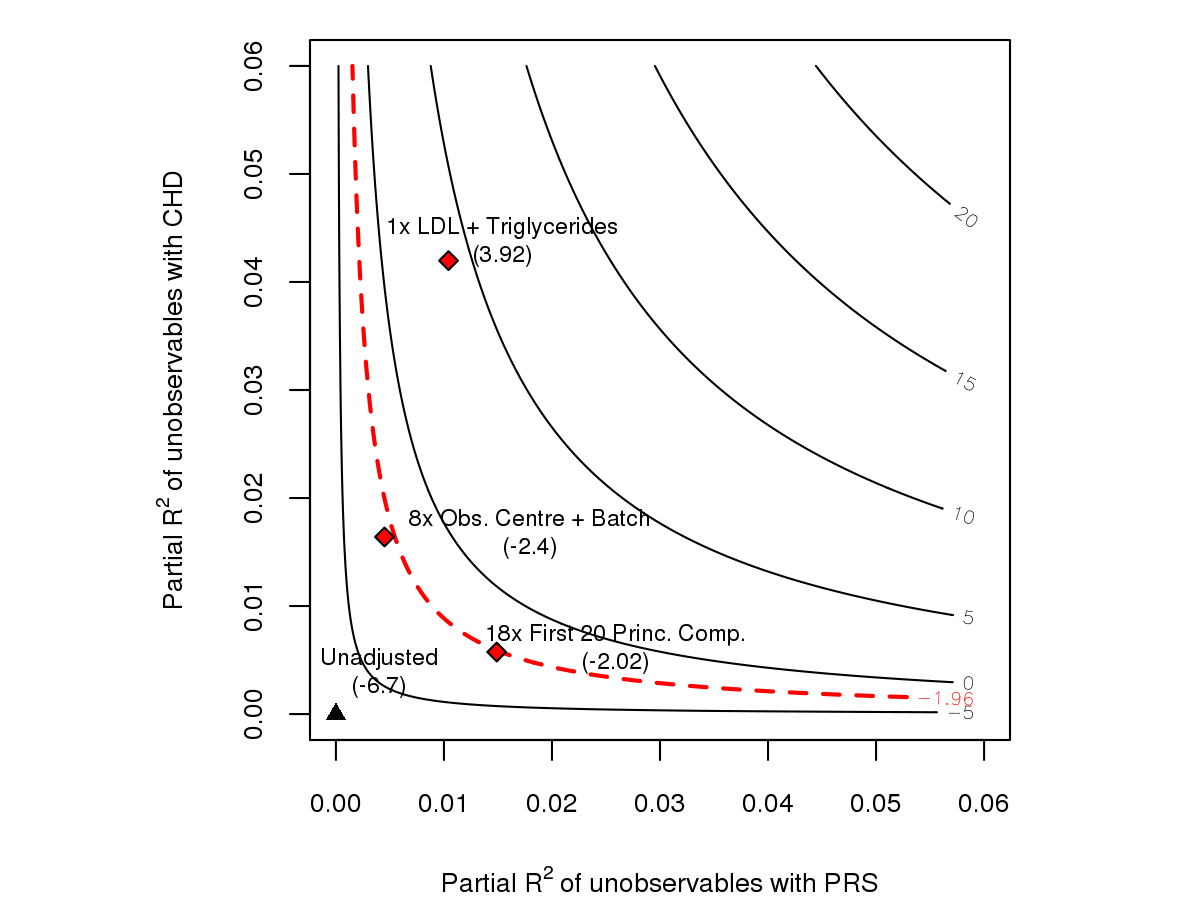

In [31]:
# Contour plot for bounding on Coronary Heart Disease (CHD)
xlab <- expression(paste("Partial ", R^2, " of unobservables with PRS"))
ylab <- expression(paste("Partial ", R^2, " of unobservables with CHD"))
options(repr.plot.width = 6, repr.plot.height = 4.5, repr.plot.res = 200)
plot(sense.rf.chd, 
     sensitivity.of = "t-value",
     nlevels = 5,
     lim = 0.06, lim.y = 0.06,
     xlab=xlab, ylab=ylab)
#add_bound_to_contour(model = reduced.form.chd,
#                              treatment = "prs_std_hdl",
#                              benchmark_covariates = list(`All` = all),
#                              kd=0.25,
#                              label.bump.x = -0.0005, label.bump.y = 0.0035) 
#add_bound_to_contour(model = reduced.form.chd,
#                              treatment = "prs_std_hdl",
#                              benchmark_covariates = list(`Alcohol + Smoking` = c(alcohol, smoking)),
#                              kd=7)
add_bound_to_contour(model = reduced.form.chd,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`LDL + Triglycerides` = c(ldl, trig)),
                              kd=1,
                              label.bump.x = 0.005, label.bump.y = 0.0020)
add_bound_to_contour(model = reduced.form.chd,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`Obs. Centre + Batch` = c(assessment_centre, batch_effects)),
                              kd=8,
                              label.bump.x = 0.0135, label.bump.y = 0.0005)
add_bound_to_contour(model = reduced.form.chd,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`First 20 Princ. Comp.` = PCs),
                              kd=18,
                              label.bump.x = 0.0110, label.bump.y = 0.0005)

In [32]:
# Now do same plot but save to PDF (add pdf command at beginning and dev.off command at end)
pdf("chd_rf_combined.pdf", width = 4.5, height = 4.5)
xlab <- expression(paste("Partial ", R^2, " of unobservables with PRS"))
ylab <- expression(paste("Partial ", R^2, " of unobservables with CHD"))
options(repr.plot.width = 6, repr.plot.height = 4.5, repr.plot.res = 200)
plot(sense.rf.chd, 
     sensitivity.of = "t-value",
     nlevels = 5,
     lim = 0.06, lim.y = 0.06,
     xlab=xlab, ylab=ylab)
#add_bound_to_contour(model = reduced.form.chd,
#                              treatment = "prs_std_hdl",
#                              benchmark_covariates = list(`All` = all),
#                              kd=0.25,
#                              label.bump.x = -0.0005, label.bump.y = 0.0035) 
#add_bound_to_contour(model = reduced.form.chd,
#                              treatment = "prs_std_hdl",
#                              benchmark_covariates = list(`Alcohol + Smoking` = c(alcohol, smoking)),
#                              kd=7)
add_bound_to_contour(model = reduced.form.chd,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`LDL + Triglycerides` = c(ldl, trig)),
                              kd=1,
                              label.bump.x = 0.005, label.bump.y = 0.0020)
add_bound_to_contour(model = reduced.form.chd,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`Obs. Centre + Batch` = c(assessment_centre, batch_effects)),
                              kd=8,
                              label.bump.x = 0.0135, label.bump.y = 0.0005)
add_bound_to_contour(model = reduced.form.chd,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`First 20 Princ. Comp.` = PCs),
                              kd=18,
                              label.bump.x = 0.0110, label.bump.y = 0.0005)
dev.off()

png 
  2

In [33]:
sense.rf.chd.pcs <- sensemakr(model = reduced.form.chd,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`Pop. Strat.` = PCs),
                              kd = c(1))
sense.rf.chd.pcs$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x Pop. Strat.,0.0008269,0.0003191,prs_std_hdl,-0.002523,0.0003907,-6.457,-0.003288,-0.001757


In [34]:
sense.rf.chd.batch <- sensemakr(model = reduced.form.chd,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`Centre + Batch` = c(assessment_centre, batch_effects)),
                              kd = c(1))
sense.rf.chd.batch$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x Centre + Batch,0.0005622,0.00205,prs_std_hdl,-0.002413,0.0003903,-6.182,-0.003178,-0.001648


In [35]:
sense.rf.chd.smokealc <- sensemakr(model = reduced.form.chd,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`Smoking + Alcohol` = c(smoking, alcohol)),
                              kd = c(1))
sense.rf.chd.smokealc$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x Smoking + Alcohol,0.00009562,0.003756,prs_std_hdl,-0.002506,0.0003899,-6.427,-0.00327,-0.001742


In [36]:
sense.rf.chd.ldltrig <- sensemakr(model = reduced.form.chd,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`LDL + Triglycerides` = c(ldl, trig)),
                              kd = c(1))
sense.rf.chd.ldltrig$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x LDL + Triglycerides,0.01042,0.04198,prs_std_hdl,0.001505,0.0003843,3.916,0.0007516,0.002258


In [37]:
sense.rf.chd.ldl <- sensemakr(model = reduced.form.chd,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`LDL` = ldl),
                              kd = c(1))
sense.rf.chd.ldl$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x LDL,0.0001567,0.04112,prs_std_hdl,-0.002125,0.0003825,-5.556,-0.002875,-0.001375


In [38]:
sense.rf.chd.trig <- sensemakr(model = reduced.form.chd,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`Triglycerides` = trig),
                              kd = c(1))
sense.rf.chd.trig$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x Triglycerides,0.01026,0.002605,prs_std_hdl,-0.001603,0.0003921,-4.089,-0.002372,-0.0008347


In [39]:
sense.fs.chd.pcs <- sensemakr(model = first.stage,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`Pop. Strat.` = PCs),
                              kd = c(1))
sense.fs.chd.pcs$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x Pop. Strat.,0.0008269,0.0003324,prs_std_hdl,0.2135,0.0015,142.4,0.2106,0.2165


In [40]:
sense.fs.chd.batch <- sensemakr(model = first.stage,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`Centre + Batch` = c(assessment_centre, batch_effects)),
                              kd = c(1))
sense.fs.chd.batch$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x Centre + Batch,0.0005622,0.003805,prs_std_hdl,0.2128,0.001497,142.2,0.2099,0.2158


In [41]:
sense.fs.chd.ldltrig <- sensemakr(model = first.stage,
                              treatment = "prs_std_hdl",
                              benchmark_covariates = list(`LDL + Triglycerides` = c(ldl, trig)),
                              kd = c(1))
sense.fs.chd.ldltrig$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x LDL + Triglycerides,0.01042,0.2175,prs_std_hdl,0.1779,0.001333,133.4,0.1752,0.1805


In [42]:
#
#
#
#######################
# END HDL ; BELOW LDL #
#######################
#
#
#

In [54]:
ldl_X_age_sex_only  <- model.matrix(~ age + I(age^2) + sex, data=data)

In [55]:
ldl_ivmodel.chd.age_sex_only <- ivmodel(Y = data$chd, D = data$ldl_std, Z = data$prs_std_ldl, X = ldl_X_age_sex_only)

Warning message in ivmodel(Y = data$chd, D = data$ldl_std, Z = data$prs_std_ldl, :
“Trying to add the intercept term of ones, 
                    but X already contains a constant covariate! Check your X. For now,
                    we'll not add an intercept term in X to avoid rank deficiency.”


In [56]:
summary(ldl_ivmodel.chd.age_sex_only)
confint(ldl_ivmodel.chd.age_sex_only)


Call:
ivmodel(Y = data$chd, D = data$ldl_std, Z = data$prs_std_ldl, 
    X = ldl_X_age_sex_only)
sample size: 252854
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

First Stage Regression Result:

F=3513, df1=1, df2=252849, p-value is <0.0000000000000002
R-squared=0.0137,   Adjusted R-squared=0.0137
Residual standard error: 0.983 on 252850 degrees of freedom
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Coefficients of k-Class Estimators:

               k  Estimate Std. Error t value            Pr(>|t|)    
OLS     0.000000 -0.039031   0.000394   -99.1 <0.0000000000000002 ***
Fuller  0.999996  0.037613   0.003609    10.4 <0.0000000000000002 ***
TSLS    1.000000  0.037635   0.003609    10.4 <0.0000000000000002 ***
LIML    1.000000  0.037635   0.003609    10.4 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Alternative tests for the treatment effect und

,2.5%,97.5%
OLS,-0.03980,-0.03826
Fuller,0.03054,0.04469
TSLS,0.03056,0.04471
LIML,0.03056,0.04471
AR,0.03064,0.04480
CLR,0.03064,0.04480


In [20]:
ldl_X_no_hdl_trig <- model.matrix(~ age + I(age^2) + sex +
                         #hdl_std + trig_std +
                         #alcohol + smoking +
                         assessment_centre + genotype_batch +
                         PC1 + PC2 + PC3 +  PC4 + PC5 + PC6 +
                         PC7 + PC8 + PC9 + PC10 + PC11 +
                         PC12 + PC13 + PC14 + PC15 + PC16 + PC17 +
                         PC18 + PC19 + PC20, data= data)

In [21]:
ldl_ivmodel.chd.no_hdl_trig <- ivmodel(Y = data$chd, D = data$ldl_std, Z = data$prs_std_ldl, X = ldl_X_no_hdl_trig)

Warning message in ivmodel(Y = data$chd, D = data$ldl_std, Z = data$prs_std_ldl, :
“Trying to add the intercept term of ones, 
                    but X already contains a constant covariate! Check your X. For now,
                    we'll not add an intercept term in X to avoid rank deficiency.”


In [22]:
summary(ldl_ivmodel.chd.no_hdl_trig)
confint(ldl_ivmodel.chd.no_hdl_trig)


Call:
ivmodel(Y = data$chd, D = data$ldl_std, Z = data$prs_std_ldl, 
    X = ldl_X_no_hdl_trig)
sample size: 252854
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

First Stage Regression Result:

F=3557, df1=1, df2=252704, p-value is <0.0000000000000002
R-squared=0.01388,   Adjusted R-squared=0.01388
Residual standard error: 0.9818 on 252705 degrees of freedom
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Coefficients of k-Class Estimators:

               k  Estimate Std. Error t value            Pr(>|t|)    
OLS     0.000000 -0.039006   0.000394  -99.02 <0.0000000000000002 ***
Fuller  0.999996  0.034746   0.003568    9.74 <0.0000000000000002 ***
TSLS    1.000000  0.034767   0.003568    9.74 <0.0000000000000002 ***
LIML    1.000000  0.034767   0.003568    9.74 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Alternative tests for the treatment effect u

,2.5%,97.5%
OLS,-0.03978,-0.03823
Fuller,0.02775,0.04174
TSLS,0.02777,0.04176
LIML,0.02777,0.04176
AR,0.02785,0.04185
CLR,0.02785,0.04185


In [23]:
ldl_X <- model.matrix(~age + I(age^2) + sex +
                         hdl_std + trig_std +
                         #alcohol + smoking +
                         assessment_centre + genotype_batch +
                         PC1 + PC2 + PC3 +  PC4 + PC5 + PC6 +
                         PC7 + PC8 + PC9 + PC10 + PC11 +
                         PC12 + PC13 + PC14 + PC15 + PC16 + PC17 +
                         PC18 + PC19 + PC20, data= data)

In [24]:
ldl_ivmodel.chd <- ivmodel(Y = data$chd, D = data$ldl_std, Z = data$prs_std_ldl, X = ldl_X)

Warning message in ivmodel(Y = data$chd, D = data$ldl_std, Z = data$prs_std_ldl, :
“Trying to add the intercept term of ones, 
                    but X already contains a constant covariate! Check your X. For now,
                    we'll not add an intercept term in X to avoid rank deficiency.”


In [25]:
summary(ldl_ivmodel.chd)
confint(ldl_ivmodel.chd)


Call:
ivmodel(Y = data$chd, D = data$ldl_std, Z = data$prs_std_ldl, 
    X = ldl_X)
sample size: 252854
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

First Stage Regression Result:

F=4091, df1=1, df2=252702, p-value is <0.0000000000000002
R-squared=0.01593,   Adjusted R-squared=0.01593
Residual standard error: 0.9361 on 252703 degrees of freedom
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Coefficients of k-Class Estimators:

               k  Estimate Std. Error t value             Pr(>|t|)    
OLS     0.000000 -0.039480   0.000411  -96.04 < 0.0000000000000002 ***
Fuller  0.999996  0.021325   0.003395    6.28        0.00000000034 ***
LIML    1.000000  0.021340   0.003395    6.29        0.00000000033 ***
TSLS    1.000000  0.021340   0.003395    6.29        0.00000000033 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Alternative tests for the treatment effect under H_

,2.5%,97.5%
OLS,-0.04029,-0.03867
Fuller,0.01467,0.02798
LIML,0.01469,0.02799
TSLS,0.01469,0.02799
AR,0.01474,0.02806
CLR,0.01474,0.02806


In [26]:
# First Stage
ldl_first.stage <- lm(ldl_std ~ prs_std_ldl + age + I(age^2) + sex +
                         hdl_std + trig_std +
                         alcohol + smoking  +
                         assessment_centre + genotype_batch +
                         PC1 + PC2 + PC3 +  PC4 + PC5 + PC6 +
                         PC7 + PC8 + PC9 + PC10 + PC11 +
                         PC12 + PC13 + PC14 + PC15 + PC16 + PC17 +
                         PC18 + PC19 + PC20,
                         data = data)

In [27]:
# redefine covariate variable group to include hdl instead of ldl
hdl <- grep("hdl_std",names(coef(ldl_first.stage)), value = T)
ldl_all <- c(assessment_centre, batch_effects, PCs, smoking, alcohol, age, sex, hdl, trig)

In [28]:
# we can use for checking partial association of PRS with other variables
ldl_instrument.model <- lm(prs_std_ldl ~  age + I(age^2) + sex +
                         hdl_std + trig_std +
                         alcohol + smoking  +
                         assessment_centre + genotype_batch +
                         PC1 + PC2 + PC3 +  PC4 + PC5 + PC6 +
                         PC7 + PC8 + PC9 + PC10 + PC11 +
                         PC12 + PC13 + PC14 + PC15 + PC16 + PC17 +
                         PC18 + PC19 + PC20,
                         data = data)

In [29]:
sensitivity_stats(model = ldl_first.stage,  treatment = "prs_std_ldl")

treatment,estimate,se,t_statistic,r2yd.x,rv_q,rv_qa,f2yd.x,dof
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<numeric>,<numeric>,<dbl>,<int>
prs_std_ldl,-0.1202,0.001874,-64.14,0.01602,0.1197,0.1163,0.01628,252695


In [30]:
group_partial_r2(model = ldl_first.stage, covariates = ldl_all)

[1] 0.112

In [31]:
summary(ldl_instrument.model)$r.
group_partial_r2(model = ldl_instrument.model, covariates = ldl_all)

[1] 0.01463

[1] 0.01463

In [32]:
summary(ldl_first.stage)


Call:
lm(formula = ldl_std ~ prs_std_ldl + age + I(age^2) + sex + hdl_std + 
    trig_std + alcohol + smoking + assessment_centre + genotype_batch + 
    PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + 
    PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + 
    PC20, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-4.649 -0.652 -0.029  0.607  7.171 

Coefficients:
                                    Estimate Std. Error t value
(Intercept)                       -4.2236573  0.0961084  -43.95
prs_std_ldl                       -0.1201993  0.0018741  -64.14
age                                0.1530469  0.0034030   44.97
I(age^2)                          -0.0013710  0.0000307  -44.72
sexMale                           -0.1029102  0.0043018  -23.92
hdl_std                            0.2232011  0.0023616   94.51
trig_std                           0.3246552  0.0020950  154.96
alcoholNever                      -0.0008594  0.0086081   -0.10
alcoholOnce or tw

In [33]:
summary(ldl_instrument.model)


Call:
lm(formula = prs_std_ldl ~ age + I(age^2) + sex + hdl_std + trig_std + 
    alcohol + smoking + assessment_centre + genotype_batch + 
    PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + 
    PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + 
    PC20, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-4.255 -0.673 -0.017  0.655  4.724 

Coefficients:
                                    Estimate Std. Error t value
(Intercept)                        0.1200068  0.1020154    1.18
age                               -0.0066803  0.0036122   -1.85
I(age^2)                           0.0000593  0.0000325    1.82
sexMale                            0.0932234  0.0045625   20.43
hdl_std                            0.0974980  0.0024993   39.01
trig_std                          -0.0099291  0.0022237   -4.47
alcoholNever                       0.0849500  0.0091357    9.30
alcoholOnce or twice a week        0.0594519  0.0059450   10.00
alcoholOne to three times a

In [34]:
ldl_sens.first.stage.all <- sensemakr(model = ldl_first.stage,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`All` = ldl_all),
                              kd = c(1, 2, 3))

In [35]:
summary(ldl_sens.first.stage.all)

Sensitivity Analysis to Unobserved Confounding

Model Formula: ldl_std ~ prs_std_ldl + age + I(age^2) + sex + hdl_std + trig_std + 
    alcohol + smoking + assessment_centre + genotype_batch + 
    PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + 
    PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + 
    PC20

Null hypothesis: q = 1 and reduce = TRUE 
-- This means we are considering biases that reduce the absolute value of the current estimate.
-- The null hypothesis deemed problematic is H0:tau = 0 

Unadjusted Estimates of 'prs_std_ldl': 
  Coef. estimate: -0.12 
  Standard Error: 0.002 
  t-value (H0:tau = 0): -64.14 

Sensitivity Statistics:
  Partial R2 of treatment with outcome: 0.016 
  Robustness Value, q = 1: 0.12 
  Robustness Value, q = 1, alpha = 0.05: 0.116 

Verbal interpretation of sensitivity statistics:

-- Partial R2 of the treatment with the outcome: an extreme confounder (orthogonal to the covariates) that explains 100% of the residual var

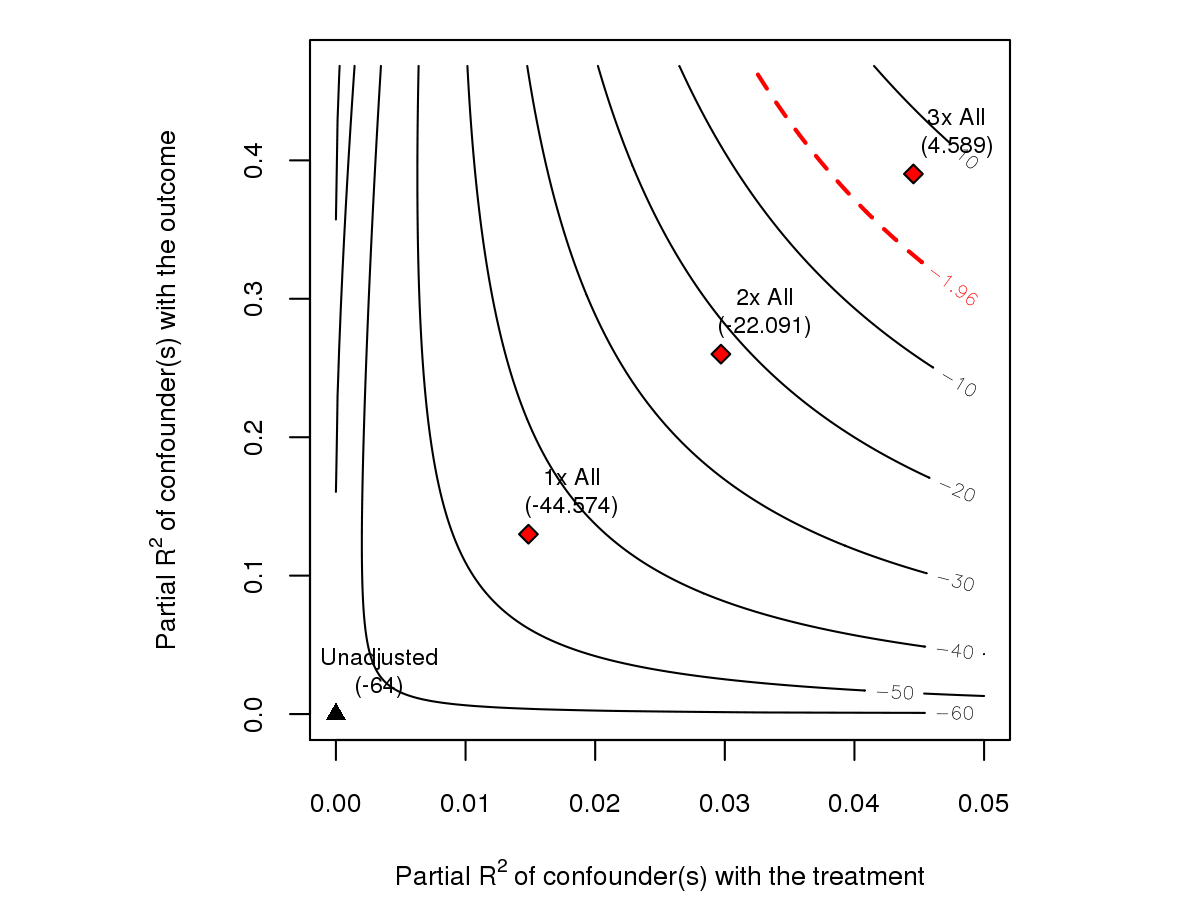

In [36]:
options(repr.plot.width = 6, repr.plot.height = 4.5, repr.plot.res = 200)
plot(ldl_sens.first.stage.all, sensitivity.of = "t-value", lim = 0.05)

In [37]:
# RF Coronary Heart Disease Sensitivity

ldl_reduced.form.chd <- lm(chd ~ prs_std_ldl + age + I(age^2) + sex +
                         hdl_std + trig_std +
                         alcohol + smoking +
                         assessment_centre + genotype_batch +
                         PC1 + PC2 + PC3 +  PC4 + PC5 + PC6 +
                         PC7 + PC8 + PC9 + PC10 + PC11 +
                         PC12 + PC13 + PC14 + PC15 + PC16 + PC17 +
                         PC18 + PC19 + PC20,
                         data = data)

In [38]:
partial_r2(ldl_reduced.form.chd, covariates = "prs_std_ldl")

prs_std_ldl 
  0.0001833

In [39]:
sensitivity_stats(ldl_reduced.form.chd, treatment = "prs_std_ldl")

treatment,estimate,se,t_statistic,r2yd.x,rv_q,rv_qa,f2yd.x,dof
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<numeric>,<numeric>,<dbl>,<int>
prs_std_ldl,-0.002703,0.0003971,-6.807,0.0001833,0.01345,0.009595,0.0001833,252695


In [40]:
ldl_sense.rf.chd <- sensemakr(model = ldl_reduced.form.chd,
                              treatment = "prs_std_ldl")#,
                              #benchmark_covariates = list(`All` = all),
                              #kd = c(1))

In [41]:
summary(ldl_sense.rf.chd)

Sensitivity Analysis to Unobserved Confounding

Model Formula: chd ~ prs_std_ldl + age + I(age^2) + sex + hdl_std + trig_std + 
    alcohol + smoking + assessment_centre + genotype_batch + 
    PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + 
    PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + 
    PC20

Null hypothesis: q = 1 and reduce = TRUE 
-- This means we are considering biases that reduce the absolute value of the current estimate.
-- The null hypothesis deemed problematic is H0:tau = 0 

Unadjusted Estimates of 'prs_std_ldl': 
  Coef. estimate: -0.003 
  Standard Error: 0 
  t-value (H0:tau = 0): -6.807 

Sensitivity Statistics:
  Partial R2 of treatment with outcome: 0 
  Robustness Value, q = 1: 0.013 
  Robustness Value, q = 1, alpha = 0.05: 0.01 

Verbal interpretation of sensitivity statistics:

-- Partial R2 of the treatment with the outcome: an extreme confounder (orthogonal to the covariates) that explains 100% of the residual variance of th

In [42]:
str(ldl_sense.rf.chd$sensitivity_stats)

'data.frame':	1 obs. of  9 variables:
 $ treatment  : chr "prs_std_ldl"
 $ estimate   : num -0.0027
 $ se         : num 0.000397
 $ t_statistic: num -6.81
 $ r2yd.x     : num 0.000183
 $ rv_q       : num 0.0134
  ..- attr(*, "q")= num 1
  ..- attr(*, "alpha")= num 1
 $ rv_qa      : num 0.0096
  ..- attr(*, "q")= num 1
  ..- attr(*, "alpha")= num 0.05
 $ f2yd.x     : num 0.000183
 $ dof        : int 252695


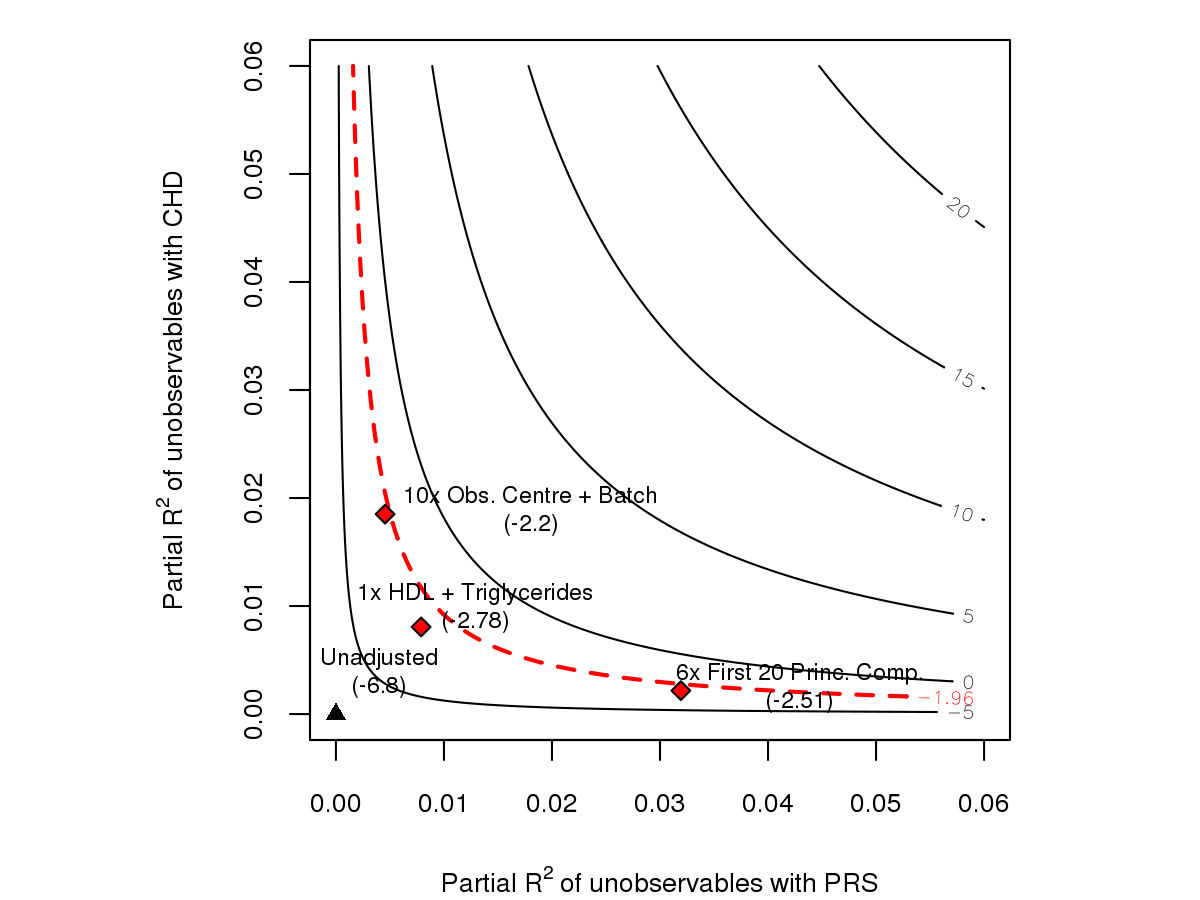

In [43]:
# Contour plot for bounding on Coronary Heart Disease (CHD)
xlab <- expression(paste("Partial ", R^2, " of unobservables with PRS"))
ylab <- expression(paste("Partial ", R^2, " of unobservables with CHD"))
options(repr.plot.width = 6, repr.plot.height = 4.5, repr.plot.res = 200)
plot(ldl_sense.rf.chd, 
     sensitivity.of = "t-value",
     nlevels = 5,
     lim = 0.06, lim.y = 0.06,
     xlab=xlab, ylab=ylab)
#add_bound_to_contour(model = ldl_reduced.form.chd,
#                              treatment = "prs_std_ldl",
#                              benchmark_covariates = list(`All` = ldl_all),
#                              kd=1,
#                              label.bump.x = -0.0005, label.bump.y = 0.0035) 
add_bound_to_contour(model = ldl_reduced.form.chd,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`HDL + Triglycerides` = c(hdl, trig)),
                              kd=1,
                              label.bump.x = 0.005, label.bump.y = 0.0020)
add_bound_to_contour(model = ldl_reduced.form.chd,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`Obs. Centre + Batch` = c(assessment_centre, batch_effects)),
                              kd=10,
                              label.bump.x = 0.0135, label.bump.y = 0.0005)
add_bound_to_contour(model = ldl_reduced.form.chd,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`First 20 Princ. Comp.` = PCs),
                              kd=6,
                              label.bump.x = 0.0110, label.bump.y = 0.0005)

In [44]:
# Now do same plot but save to PDF (add pdf command at beginning and dev.off command at end)
pdf("ldl_chd_rf_combined.pdf", width = 4.5, height = 4.5)
xlab <- expression(paste("Partial ", R^2, " of unobservables with PRS"))
ylab <- expression(paste("Partial ", R^2, " of unobservables with CHD"))
options(repr.plot.width = 6, repr.plot.height = 4.5, repr.plot.res = 200)
plot(ldl_sense.rf.chd, 
     sensitivity.of = "t-value",
     nlevels = 5,
     lim = 0.06, lim.y = 0.06,
     xlab=xlab, ylab=ylab)
#add_bound_to_contour(model = ldl_reduced.form.chd,
#                              treatment = "prs_std_ldl",
#                              benchmark_covariates = list(`All` = ldl_all),
#                              kd=1,
#                              label.bump.x = -0.0005, label.bump.y = 0.0035) 
add_bound_to_contour(model = ldl_reduced.form.chd,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`HDL + Triglycerides` = c(hdl, trig)),
                              kd=1,
                              label.bump.x = 0.005, label.bump.y = 0.0020)
add_bound_to_contour(model = ldl_reduced.form.chd,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`Obs. Centre + Batch` = c(assessment_centre, batch_effects)),
                              kd=10,
                              label.bump.x = 0.0135, label.bump.y = 0.0005)
add_bound_to_contour(model = ldl_reduced.form.chd,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`First 20 Princ. Comp.` = PCs),
                              kd=6,
                              label.bump.x = 0.0110, label.bump.y = 0.0005)
dev.off()

png 
  2

In [45]:
ldl_sense.rf.chd.pcs <- sensemakr(model = ldl_reduced.form.chd,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`Pop. Strat.` = PCs),
                              kd = c(1))
ldl_sense.rf.chd.pcs$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x Pop. Strat.,0.005322,0.0003619,prs_std_ldl,-0.002425,0.0003981,-6.092,-0.003205,-0.001645


In [46]:
ldl_sense.rf.chd.batch <- sensemakr(model = ldl_reduced.form.chd,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`Centre + Batch` = c(assessment_centre, batch_effects)),
                              kd = c(1))
ldl_sense.rf.chd.batch$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x Centre + Batch,0.0004553,0.001851,prs_std_ldl,-0.002519,0.0003968,-6.35,-0.003297,-0.001742


In [47]:
ldl_sense.rf.chd.hdltrig <- sensemakr(model = ldl_reduced.form.chd,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`HDL + Triglycerides` = c(hdl, trig)),
                              kd = c(1))
ldl_sense.rf.chd.hdltrig$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x HDL + Triglycerides,0.007887,0.008068,prs_std_ldl,-0.001104,0.000397,-2.781,-0.001882,-0.000326


In [48]:
ldl_sense.rf.chd.hdl <- sensemakr(model = ldl_reduced.form.chd,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`HDL` = hdl),
                              kd = c(1))
ldl_sense.rf.chd.hdl$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x HDL,0.006022,0.008036,prs_std_ldl,-0.00131,0.0003967,-3.302,-0.002087,-0.0005325


In [49]:
ldl_sense.rf.chd.trig <- sensemakr(model = ldl_reduced.form.chd,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`Triglycerides` = trig),
                              kd = c(1))
ldl_sense.rf.chd.trig$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x Triglycerides,0.0000789,0.00115,prs_std_ldl,-0.002643,0.0003969,-6.659,-0.00342,-0.001865


In [50]:
ldl_sense.fs.chd.pcs <- sensemakr(model = ldl_first.stage,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`Pop. Strat.` = PCs),
                              kd = c(1))
ldl_sense.fs.chd.pcs$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x Pop. Strat.,0.005322,0.0003552,prs_std_ldl,-0.1189,0.001879,-63.29,-0.1226,-0.1152


In [51]:
ldl_sense.fs.chd.batch <- sensemakr(model = ldl_first.stage,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`Centre + Batch` = c(assessment_centre, batch_effects)),
                              kd = c(1))
ldl_sense.fs.chd.batch$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x Centre + Batch,0.0004553,0.001963,prs_std_ldl,-0.1193,0.001873,-63.71,-0.123,-0.1156


In [52]:
ldl_sense.fs.chd.hdltrig <- sensemakr(model = ldl_first.stage,
                              treatment = "prs_std_ldl",
                              benchmark_covariates = list(`HDL + Triglycerides` = c(hdl, trig)),
                              kd = c(1))
ldl_sense.fs.chd.hdltrig$bounds

bound_label,r2dz.x,r2yz.dx,treatment,adjusted_estimate,adjusted_se,adjusted_t,adjusted_lower_CI,adjusted_upper_CI
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<numeric>,<dbl>,<dbl>
1x HDL + Triglycerides,0.007887,0.1018,prs_std_ldl,-0.09339,0.001783,-52.37,-0.09689,-0.0899


In [53]:
cor(data$prs_ldl, data$ldl_std)
cor(data$prs_hdl, data$hdl_std)
cor(data$prs_ldl, data$chd)
cor(data$prs_hdl, data$chd)

[1] -0.1159

[1] 0.2491

[1] -0.02095

[1] -0.01522